# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [22]:
# student 1: Matan 3262

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [49]:
# Project Dependencies:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Load Data into Project
train_data = pd.read_csv('./data/cancer_train.csv')
test_data = pd.read_csv('./data/cancer_test.csv')

In [25]:
# Present Data - Train:
print('Train Data Preview:')
train_data.head()


Train Data Preview:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [26]:
# Present Data - Train:
print('Test Data Preview:')
test_data.head()

Test Data Preview:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


In [27]:
train_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.257910,19.482835,92.876220,668.580440,0.096224,0.105452,0.090853,0.050013,0.181970,0.062671,...,25.905626,108.558462,903.095165,0.132501,0.257053,0.276415,0.116064,0.290950,0.083924,0.608791
std,3.613344,4.261633,24.922646,364.587131,0.013793,0.053892,0.081118,0.039727,0.027895,0.006930,...,6.149887,34.615237,594.101449,0.022603,0.159287,0.208508,0.065882,0.061539,0.018236,0.488558
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.490000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.725000,16.390000,75.265000,422.300000,0.086210,0.065600,0.029700,0.020610,0.162000,0.057660,...,21.355000,84.405000,516.450000,0.116200,0.147750,0.115450,0.065280,0.251000,0.071250,0.000000
50%,13.460000,19.020000,87.160000,559.200000,0.095090,0.094530,0.063350,0.033340,0.179400,0.061400,...,25.500000,97.670000,697.700000,0.131200,0.216700,0.232200,0.101200,0.282200,0.079480,1.000000
75%,16.150000,21.960000,106.850000,807.450000,0.105000,0.130150,0.134150,0.077440,0.195950,0.066180,...,30.285000,127.750000,1151.500000,0.146400,0.341600,0.385300,0.161950,0.319600,0.092130,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.095750,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.577400,0.207500,1.000000


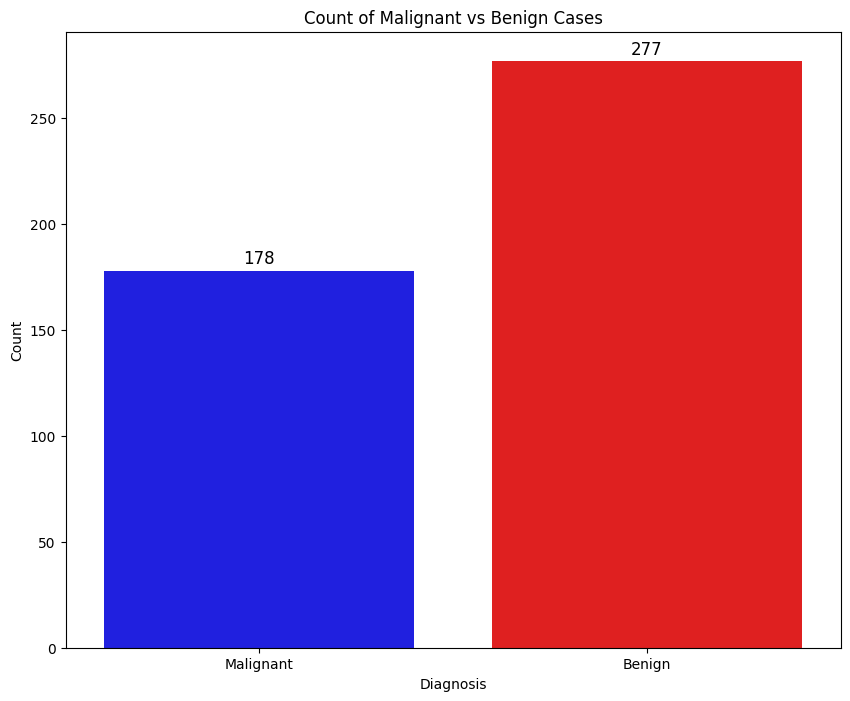

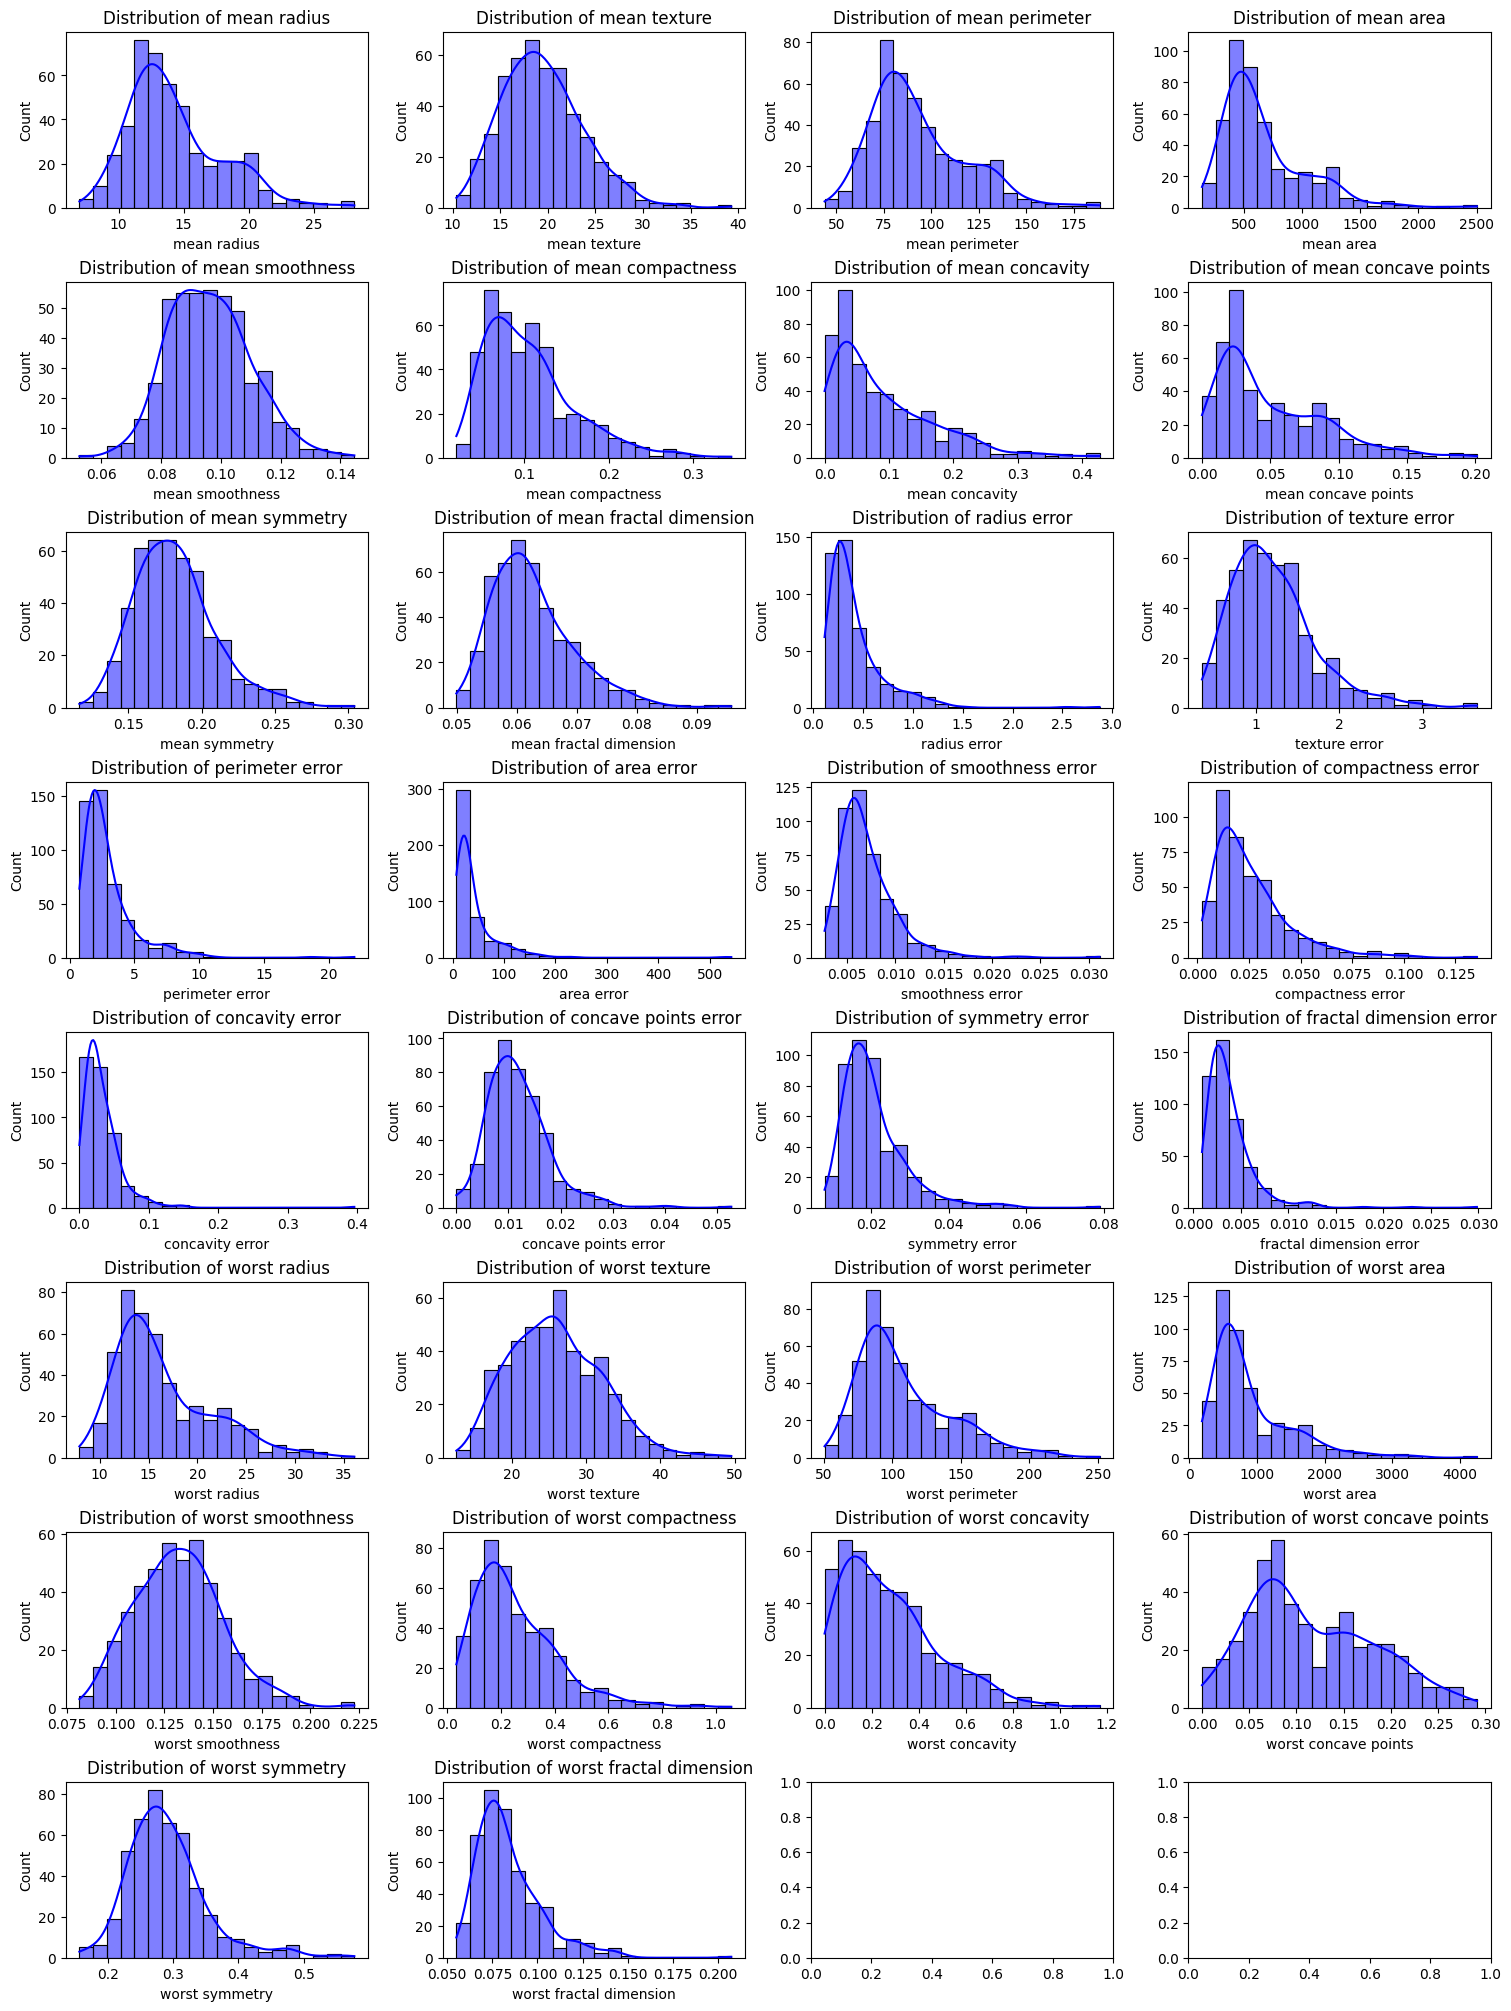

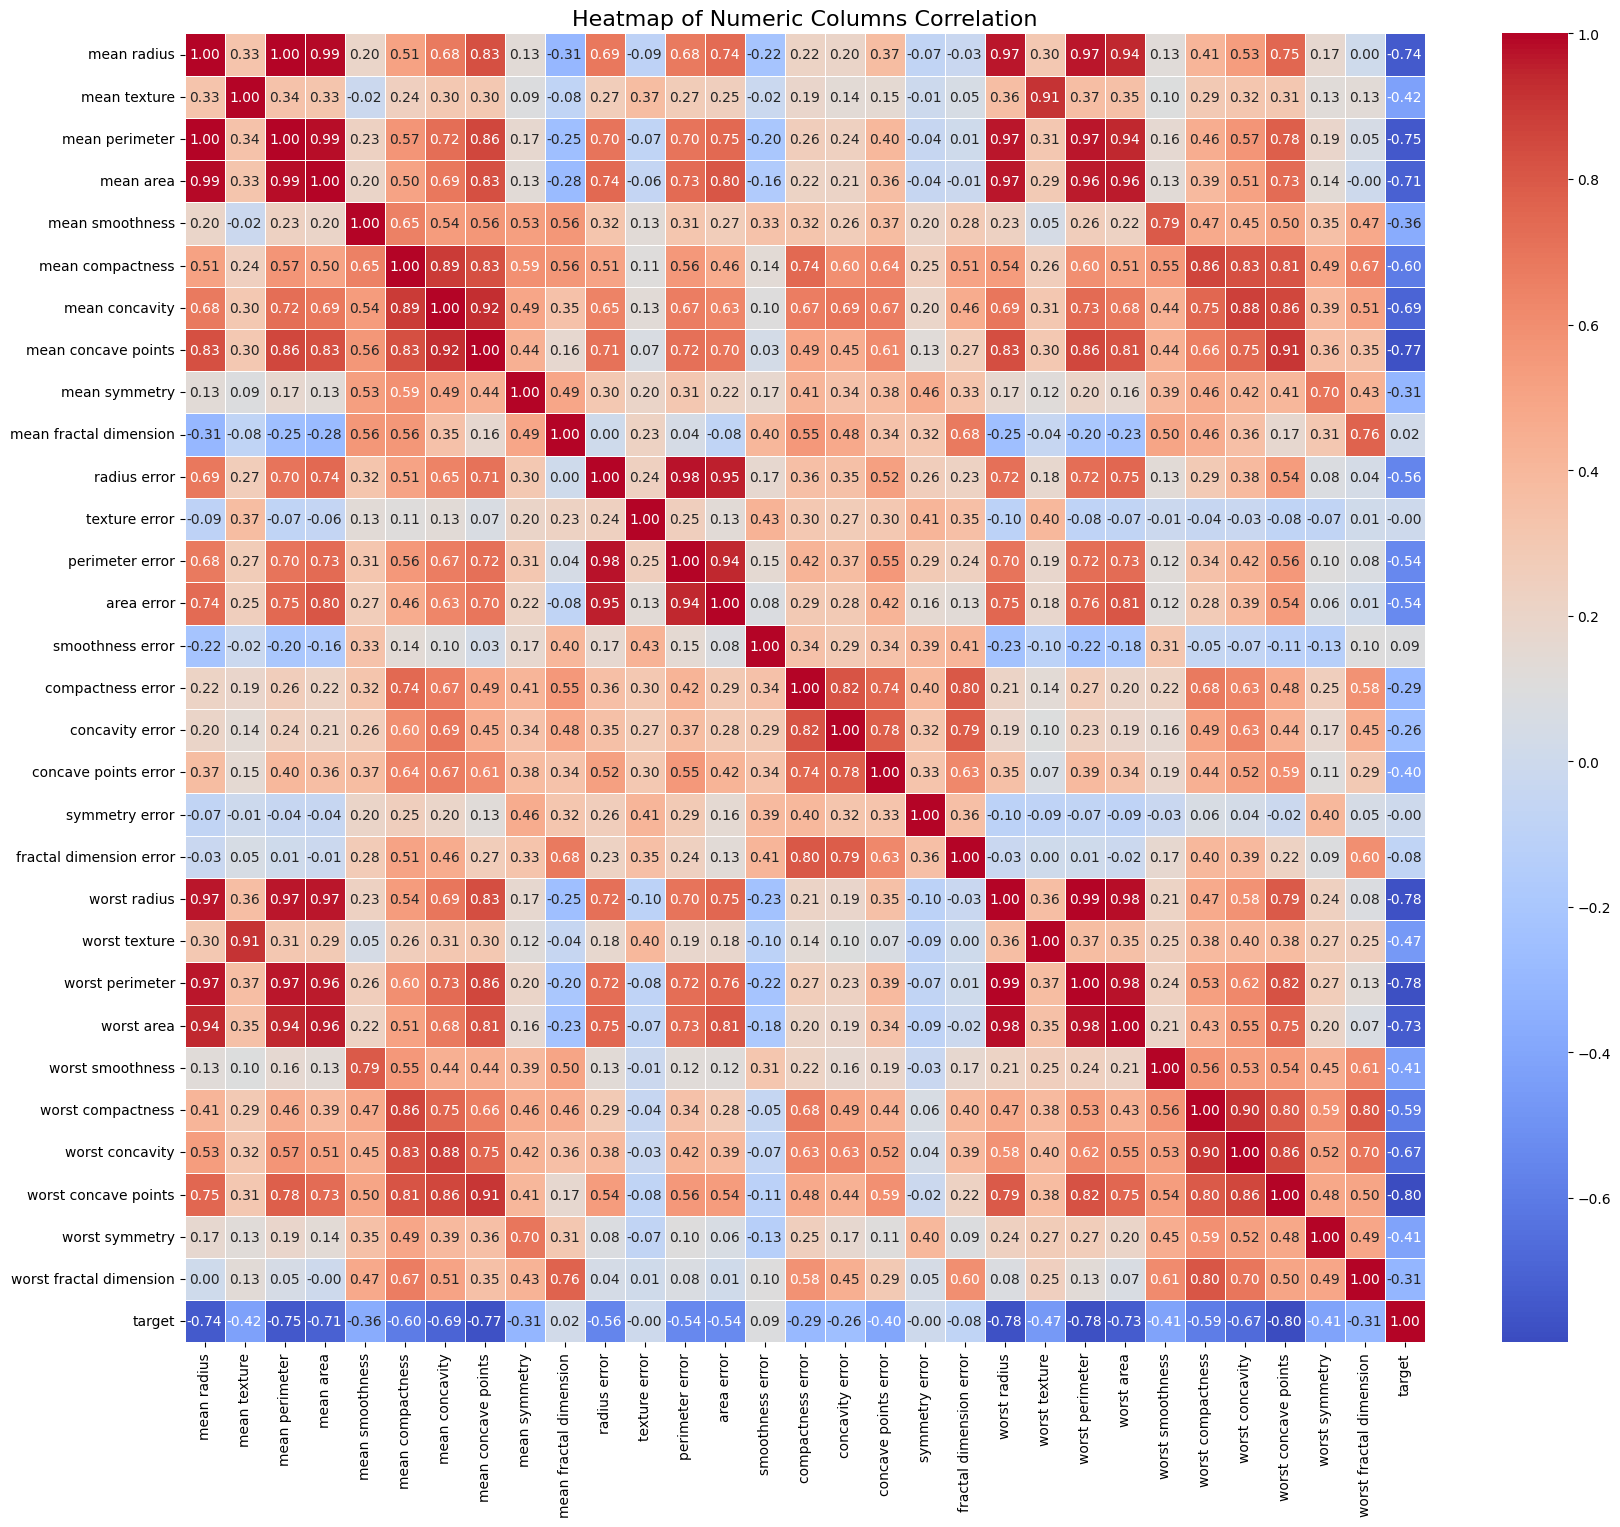

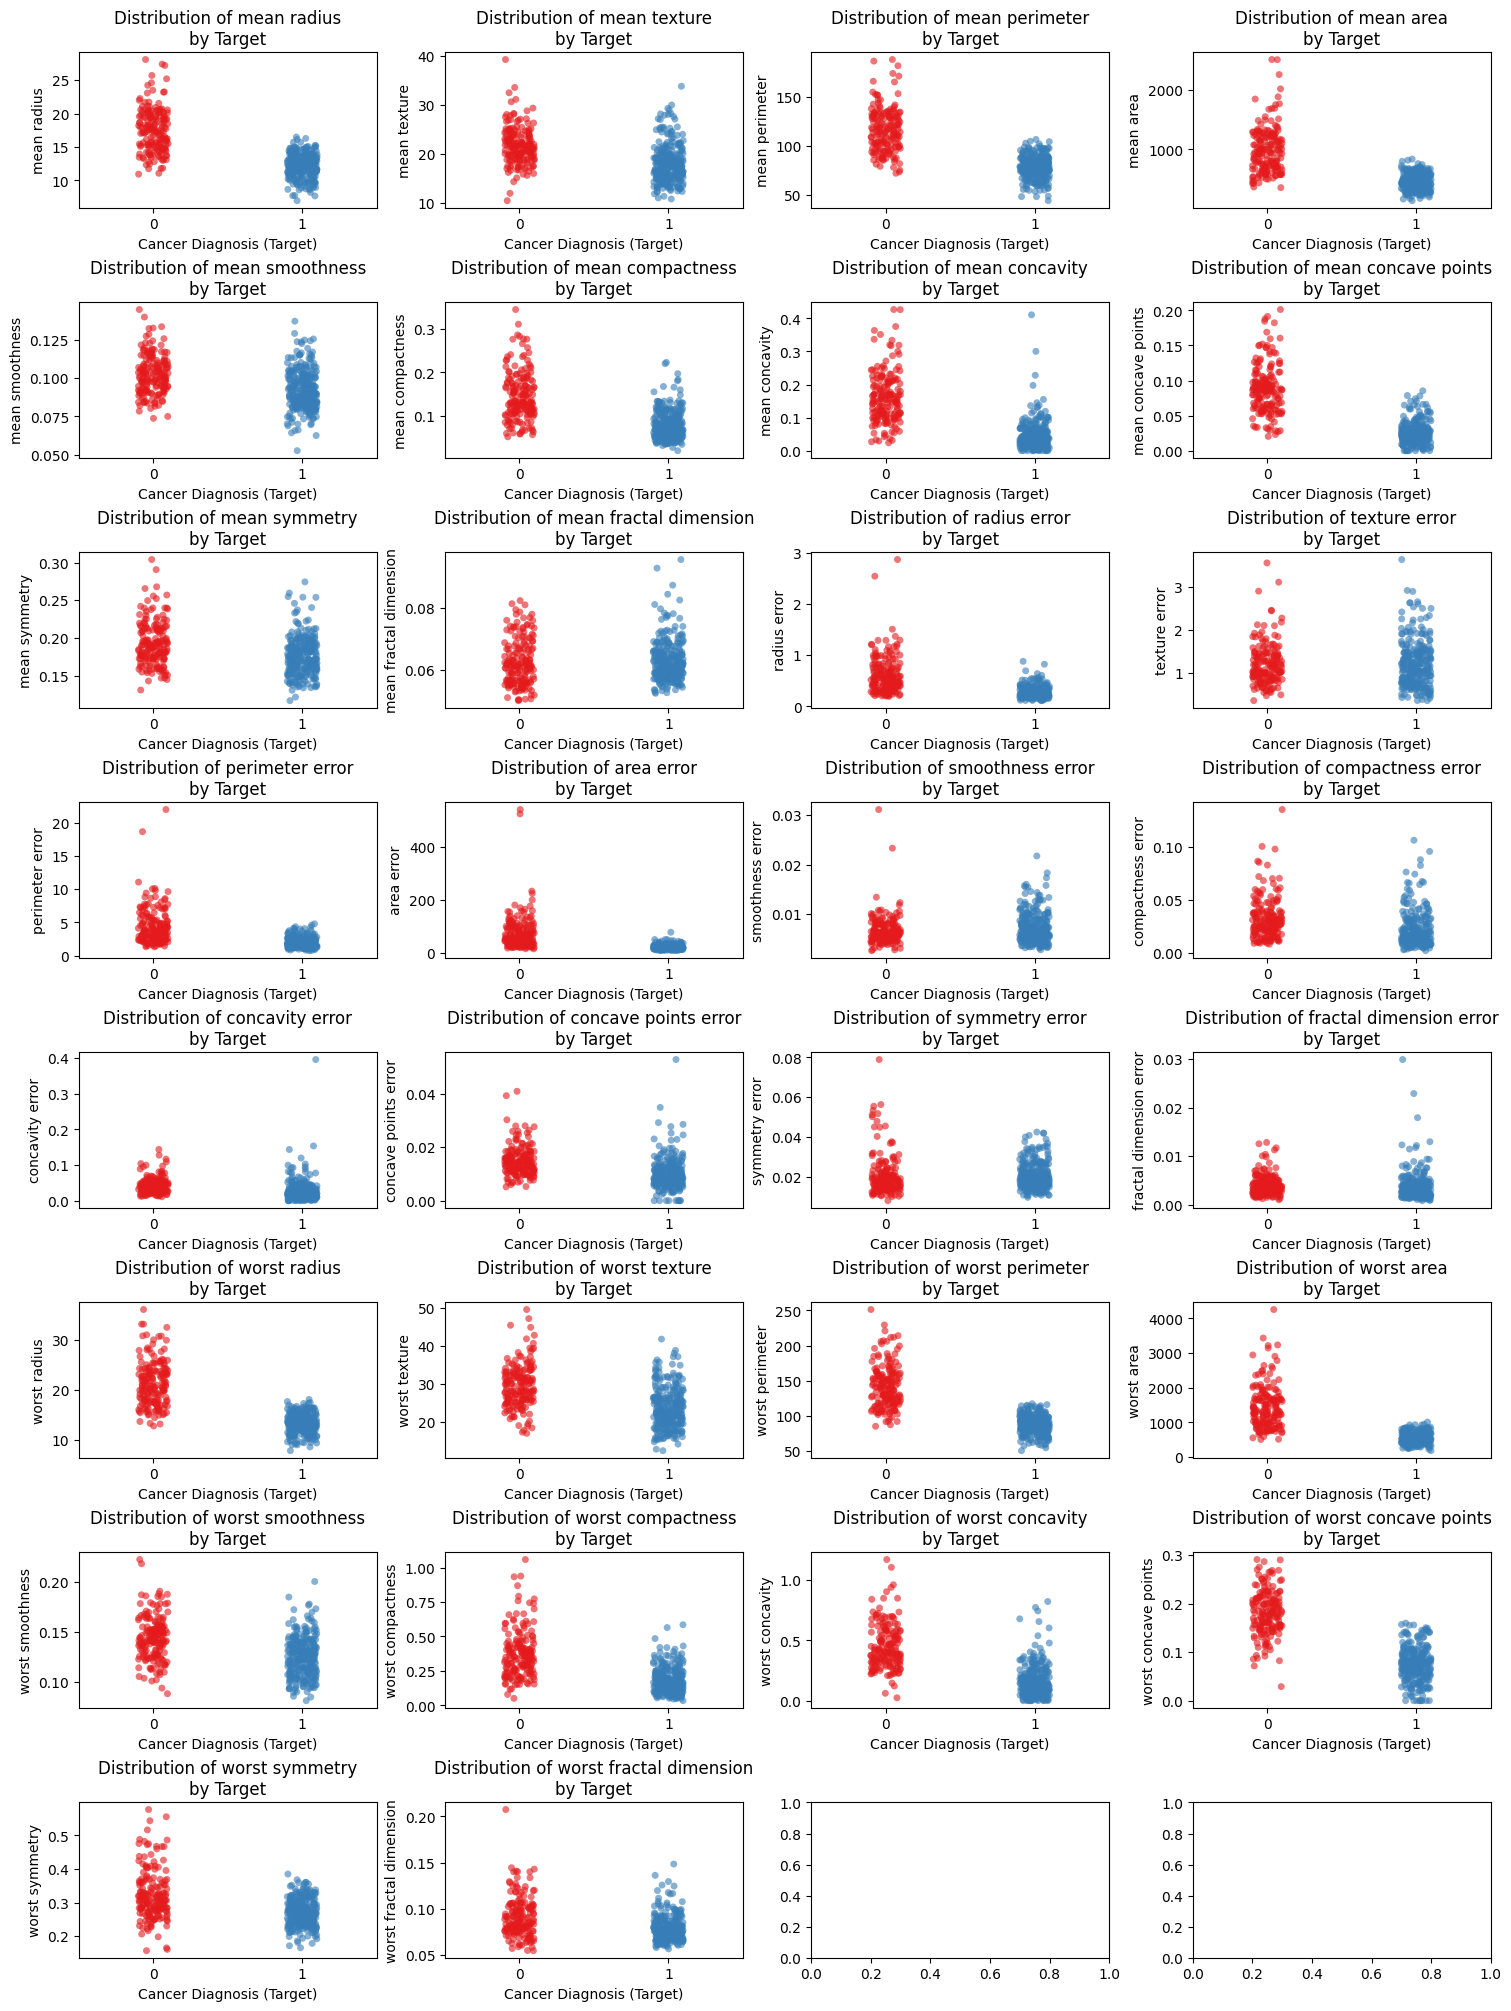

In [28]:
# Count of Target: Malignant vs Benign
plt.figure(figsize=(10, 8))
plot = sns.countplot(x='target', data=train_data, palette=['blue', 'red'], hue='target', legend=False)
plot.set_xticks([0, 1])
plot.set_xticklabels(['Malignant', 'Benign'])
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='baseline', 
                  color='black', fontsize=12, 
                  xytext=(0, 5),
                  textcoords='offset points')

plt.title('Count of Malignant vs Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Distribution of each column
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)
for i, col in enumerate(train_data.drop(columns=['target'])):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]
    sns.histplot(train_data[col], bins=20, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Count')
plt.show()

# Heatmap of the data
plt.figure(figsize=(20, 17))  
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, linewidths=0.5)
plt.title('Heatmap of Numeric Columns Correlation', fontsize=16)
plt.show()

# Distribution of each column by the Target column
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)
for i, col in enumerate(train_data.drop(columns=['target'])):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]
    sns.stripplot(data=train_data, x='target', y=col, jitter=True, alpha=0.6, palette='Set1', hue='target', legend=False, ax=ax)
    ax.set_title(f'Distribution of {col}\nby Target')
    ax.set_xlabel('Cancer Diagnosis (Target)')
    ax.set_ylabel(col)

plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [29]:
X_train = train_data.drop(columns='target')
y_train = train_data['target']
X_test = test_data.drop(columns='target')
y_test = test_data['target']

In [30]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.670,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.140,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,23.680,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,20.380,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,...,30.790,23.87,211.50,2782.0,0.1199,0.3625,0.3794,0.22640,0.2908,0.07277
451,11.360,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,0.05913,...,13.050,36.32,85.07,521.3,0.1453,0.1622,0.1811,0.08698,0.2973,0.07745
452,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.010,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.23460,0.3589,0.09187
453,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.290,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185


In [81]:
# Creating a scaler for the data
scaler = StandardScaler()

# Defining models and hyperparameters for grid search
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Hyperparameters for each model
params = {
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },

    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },

    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5]
    }
}

# Grid search result DataFrame
results = pd.DataFrame(columns=['Model', 'Best Params', 'Best F1 Score'])

# Starting with Naive Byase
best_model = GridSearchCV(Pipeline([('scaler', scaler), ('classifier', GaussianNB())]), {}, cv=5, scoring='f1', n_jobs=-1)
best_model.fit(X_train, y_train)

# Performing a Grid Search for each model
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    
    # Perform grid search for current model
    grid = GridSearchCV(pipeline, params[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Saving the best score
    if(best_model.best_score_ < grid.best_score_):
        best_model = grid
    
    # Outputing the best parameters and results of corrent model
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best F1 score for {name}: {grid.best_score_}")
    results.loc[len(results.index)] = ({'Model': name, 'Best Params': grid.best_params_, 'Best F1 Score': grid.best_score_})


Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best F1 score for Decision Tree: 0.9379707546680758
Best parameters for KNN: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Best F1 score for KNN: 0.9717707164503503
Best parameters for SVC: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best F1 score for SVC: 0.9822032353611301
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best F1 score for Random Forest: 0.9732616940581542


In [82]:
print("\nSummary of Results:")
print(results)



Summary of Results:
           Model                                        Best Params  \
0  Decision Tree  {'classifier__max_depth': 10, 'classifier__min...   
1            KNN  {'classifier__n_neighbors': 5, 'classifier__we...   
2            SVC  {'classifier__C': 0.1, 'classifier__kernel': '...   
3  Random Forest  {'classifier__max_depth': 10, 'classifier__min...   

   Best F1 Score  
0       0.937971  
1       0.971771  
2       0.982203  
3       0.973262  
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='f1')


In [93]:
X_test = X_test.drop(columns='concavity error')
X_train = X_train.drop(columns='concavity error')

In [94]:
# Starting with Naive Byase
best_model = GridSearchCV(Pipeline([('scaler', scaler), ('classifier', GaussianNB())]), {}, cv=5, scoring='f1', n_jobs=-1)
best_model.fit(X_train, y_train)

# Performing a Grid Search for each model
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    
    # Perform grid search for current model
    grid = GridSearchCV(pipeline, params[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Saving the best score
    if(best_model.best_score_ < grid.best_score_):
        best_model = grid
    
    # Outputing the best parameters and results of corrent model
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best F1 score for {name}: {grid.best_score_}")
    results.loc[len(results.index)] = ({'Model': name, 'Best Params': grid.best_params_, 'Best F1 Score': grid.best_score_})

Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best F1 score for Decision Tree: 0.9396774550473423
Best parameters for KNN: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Best F1 score for KNN: 0.9663924794359577
Best parameters for SVC: {'classifier__C': 1, 'classifier__kernel': 'linear'}
Best F1 score for SVC: 0.98043245383635
Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best F1 score for Random Forest: 0.975062356920764


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [83]:
# Taking the best estimator based on the results
best_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='f1')

## Part 5 - Apply on test and show model performance estimation

In [88]:
# Save predictions
y_pred = best_model.predict(X_test)

# Displaying the first 5 predictions compeard to the actual 
print("First 5 predictions:")
predictVSactual=pd.DataFrame(data={'predict':y_pred,'actual':y_test})
predictVSactual.head()

First 5 predictions:


,predict,actual
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [92]:
# Final report:
# Model quality assessment
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Macro Score on Test Set:", f1, '\n')

# Detailed report
print("Classification Detailed report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

F1 Macro Score on Test Set: 0.9793851717902351 

Classification Detailed report:
              precision    recall  f1-score   support

   Malignant       0.94      1.00      0.97        34
      Benign       1.00      0.97      0.99        80

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

